In [134]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg
from skimage import io, color,transform


import math

In [135]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [136]:
image = io.imread('imgs/ed.jpg')
image = transform.resize(image,(512,512))
image_gray = color.rgb2gray(image)


In [137]:
def ellipse_points(resolution:int, center:tuple, x_rad:int, y_rad:int) -> tuple:
    t = np.linspace(0, 2*math.pi, resolution)
    x = center[0] + x_rad*np.cos(t)
    y = center[1] + y_rad*np.sin(t)

    res = np.array([x, y]).T
    
    # Exclude last point because a closed path should not have duplicate points
    return res[:-1]

In [138]:
print(image.shape)

# image_center = (int(image.shape[0]/2), int(image.shape[1]/2))
# x_offset = 0
# y_offset = 0.08 * image.shape[1]
# x_rad = image.shape[0]*0.26
# y_rad = image.shape[1]*0.3

# points = ellipse_points(400, (image_center[0] + x_offset, image_center[1] - y_offset), x_rad, y_rad )

s = np.linspace(0, 2*np.pi, 800)
r = 200 + 140*np.sin(s)
c = 260 + 130*np.cos(s)
points = np.array([r, c]).T


(512, 512, 3)


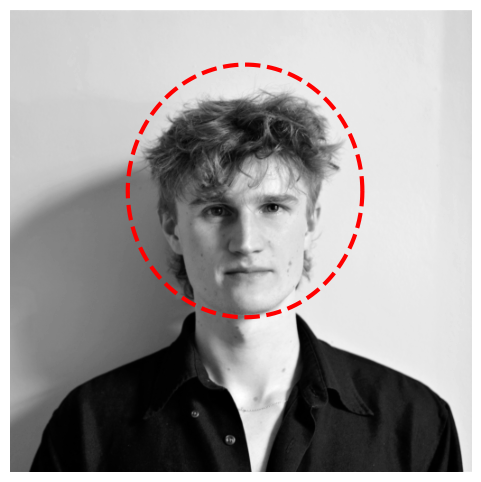

In [139]:
fig, ax = image_show(image_gray)
ax.plot(points[:, 1], points[:, 0], '--r', lw=3)

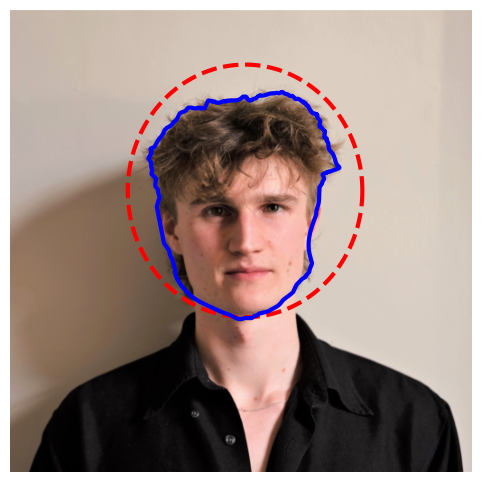

In [141]:
beta = 50 #contour smoothness factor
alpha = 0.015 #contour contraction speed factor

snake = seg.active_contour(image_gray, points, alpha=alpha, beta=beta, gamma=0.001)

fig, ax = image_show(image)
ax.plot(points[:, 1], points[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)